# 2 Regressão Linear com Regularização

Carregando os dados que estão em formato MatLab

In [27]:
import scipy.io as spio
import numpy as np  
import matplotlib.pyplot as plt
from scipy.optimize import minimize

from aprendizado_maquina import regressao_linear as rl
%matplotlib inline

In [2]:
data = spio.loadmat('data/ex5data1.mat')
data.keys()

dict_keys(['__header__', 'yval', '__globals__', 'Xval', 'y', 'ytest', 'Xtest', 'X', '__version__'])

In [36]:
y_train = data['y']
X_train = np.c_[np.ones_like(data['X']), data['X']]

yval = data['yval']
Xval = np.c_[np.ones_like(data['Xval']), data['Xval']]

print('X_train:', X.shape)
print('y_train:', y.shape)
print('Xval:', Xval.shape)
print('yval:', yval.shape)

X_train: (12, 2)
y_train: (12, 1)
Xval: (21, 2)
yval: (21, 1)


### 2.1 Visualização dos Dados

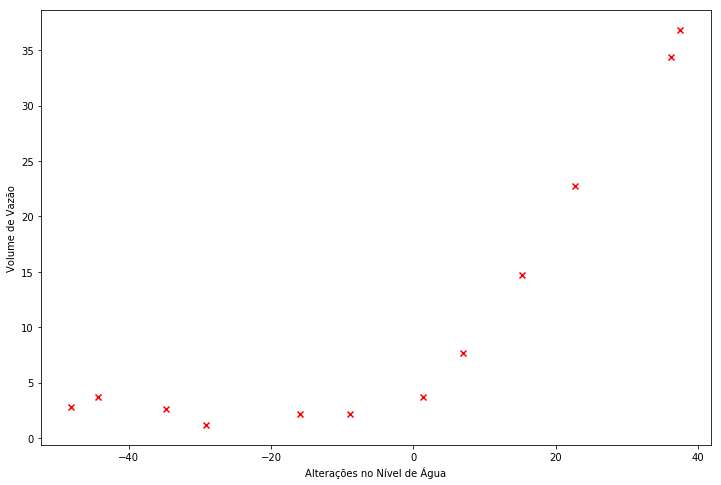

In [37]:
fig, ax = plt.subplots(figsize=(12,8)) 
ax.set_xlabel("Alterações no Nível de Água")  
ax.set_ylabel('Volume de Vazão')
ax.scatter(X[:,1], y, marker='x', c='r')

### 2.2 Função de custo da regressão linear regularizada

In [81]:
def custo_regressao_linear_regularizada(theta, X, y, reg):
    m = y.size
    h = X.dot(theta)
    J = (1/(2*m))*np.sum(np.square(h-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    return(J)

### 2.3 Gradiente na regressão linear regularizada

In [48]:
def gradiente_descendente_batch_com_regularicao(theta, X, y, reg):
    m = y.size
    h = X.dot(theta.reshape(-1,1))
    grad = (1/m)*(X.T.dot(h-y))+ (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]    
    return(grad.flatten())

In [82]:
theta_inicial = np.ones((X_train.shape[1],1))
j = custo_regressao_linear_regularizada(theta_inicial, X_train, y_train, 0)
gradiente = gradiente_descendente_batch_com_regularicao(initial_theta, X_train, y_train, 0)
print("Custo", j)
print("Gradiente", gradiente)

Custo 303.951525554
Gradiente [   -72.49898456  12411.6391135 ]


In [84]:
regularizacao = 0
max_iteracoes = 1000
g = gradiente_descendente_batch_regularizado(X, y, theta_inicial, regularizacao)
print("Gradiente", g)

Gradiente [ -15.30301567  598.16741084]


### 2.4 Ajustando os parâmetros da regressão linear

In [70]:
def treinar_modelo(X, y, regularizacao):        
    initial_theta = np.array([[15],[15]])
    resultado = minimize(custo_regressao_linear_regularizada, initial_theta, args=(X,y,regularizacao), 
               method=None, jac=gradiente_descendente_batch_com_regularicao, options={'maxiter':5000})
    return resultado

In [72]:
fit = treinar_modelo(X_train, y_train, 0)
print(fit)

      fun: 1604.4002999186634
 hess_inv: array([[ 1.03142187,  0.00617881],
       [ 0.00617881,  0.001215  ]])
      jac: array([  3.42437190e-12,  -5.70370264e-10])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([ 13.08790351,   0.36777923])


### Desenhando o Gráfico

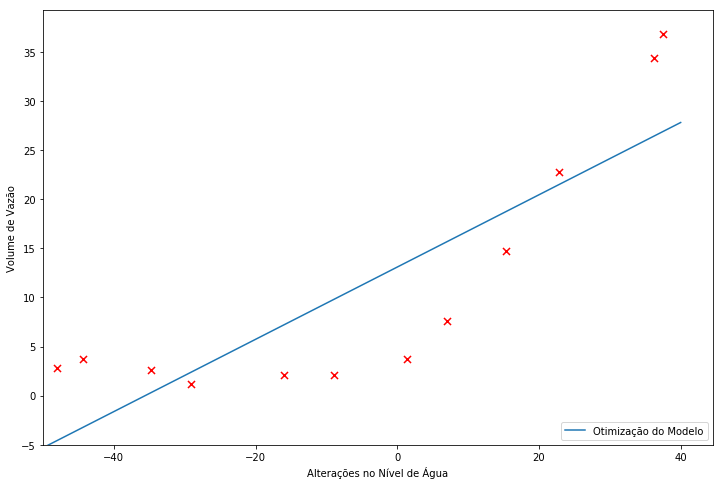

In [80]:
fig, ax = plt.subplots(figsize=(12,8)) 
ax.plot(np.linspace(-50,40), (fit.x[0]+ (fit.x[1]*np.linspace(-50,40))), label='Otimização do Modelo')
ax.scatter(X_train[:,1], y_train, s=50, c='r', marker='x', linewidths=1)
ax.set_xlabel("Alterações no Nível de Água")  
ax.set_ylabel('Volume de Vazão')
ax.set_ylim(ymin=-5)
ax.set_xlim(xmin=-50)
ax.legend(loc=4)